<a href="https://colab.research.google.com/github/lmcanavals/algorithmic_complexity/blob/main/notebooks/be_hex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/lmcanavals/algorithmic_complexity.git

fatal: destination path 'algorithmic_complexity' already exists and is not an empty directory.


In [2]:
from algorithmic_complexity.aclib.ds import DisjointSet
import numpy as np
import matplotlib.pyplot as plt

In [3]:
EMPTY = 2
BLACK = 0
WHITE = 3

class Hex:
  def __init__(self, n):
    self.n = n + 2
    self.board = np.ones((self.n, self.n)) + 1
    self.whites = DisjointSet(self.n**2)
    self.blacks = DisjointSet(self.n**2)

  def move(self, i, j, token):
    i += 1
    j += 1
    if self.board[i][j] == EMPTY:
      self.board[i][j] = token
      ds = self.blacks if token == BLACK else self.whites
      self.__save(ds, i, j, token)
      return True
    else:
      return False

  def __save(self, ds, i, j, token):
    neighbors = [(i-1, j-1), (i-1, j), (i, j-1), (i, j+1), (i+1, j), (i+1, j+1)]
    for p, q in neighbors:
      if self.board[p][q] == token:
        ds.union(i*self.n + j, p*self.n + q)

  def winner(self):
    for p in range(1, self.n-1):
      if self.board[p][1] == WHITE:
        for q in range(1, self.n-1):
          if self.board[q][self.n-2] == WHITE:
            a = p*self.n + 1
            b = q*self.n + self.n - 2
            if self.whites.isSameSet(a, b):
              return "Whites!"

      if self.board[1][p] == BLACK:
        for q in range(1, self.n-1):
          if self.board[self.n-2][q] == BLACK:
            a = self.n + p
            b = (self.n-2)*self.n + q
            if self.blacks.isSameSet(a, b):
              return "Blacks!"

    return "Nadie"

  def show(self):
    n = self.n - 2
    shift = n-1
    tempboard = np.ones((n*2, n*2+shift))
    for i in range(n):
      for j in range(n):
        tempboard[i*2:(i+1)*2, j*2+shift:(j+1)*2+shift] = self.board[i+1][j+1]
      shift -=1
    plt.imshow(tempboard, cmap='gray')
    plt.axis('off')
    plt.show()

In [4]:
import random

Whites!


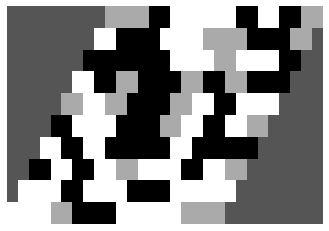

In [5]:
n = 10
jonah = Hex(n)
jugadas = [None]*(n**2)
for i in range(n):
  for j in range(n):
    jugadas[i*n + j] = (i, j)

random.shuffle(jugadas)
while jugadas and jonah.winner() == "Nadie":
  i, j = jugadas.pop()
  jonah.move(i, j, BLACK)
  i, j = jugadas.pop()
  jonah.move(i, j, WHITE)

print(jonah.winner())
jonah.show()